# 套件

In [1]:
import pandas as pd
import numpy as np

In [2]:
merge_data = pd.read_excel('merge_data_fill_na.xlsx')

In [3]:
merge_data.columns

Index(['code', 'name', 'ind', 'date', 'ret', 'size', 'year_month', 'op_exp',
       'ROA', 'ROE', 'op_pm', 'AT', 'FCF', 'Lev', 'DY', 'TQ'],
      dtype='object')

# 敘述性統計

In [4]:
merge_data.describe()

,code,date,ret,size,year_month,op_exp,ROA,ROE,op_pm,AT,FCF,Lev,DY,TQ
count,13265.000000,1.326500e+04,13265.000000,1.326500e+04,13265.00000,1.309000e+04,13090.000000,13090.000000,10472.000000,10472.000000,1.047200e+04,12145.000000,13090.000000,13090.000000
mean,2165.200000,2.018985e+07,0.050335,4.392704e+05,201898.33170,3.147039e+07,2.799070,5.783506,10.413585,0.763579,1.714747e+07,1.171134,4.124494,0.950527
std,550.992057,3.128095e+04,1.523393,3.078436e+05,312.80979,3.380600e+07,3.157478,11.567016,9.616625,0.336355,2.183555e+07,0.530501,1.381185,0.584382
min,1216.000000,2.014010e+07,-9.972700,3.320000e+03,201401.00000,7.015600e+04,-4.740000,-91.220000,-4.900000,0.350000,-2.763409e+07,-0.710000,0.710000,0.070000
25%,2013.000000,2.016091e+07,-0.604200,1.606230e+05,201609.00000,6.513481e+06,0.600000,2.150000,2.970000,0.430000,5.398600e+04,1.010000,3.440000,0.660000
50%,2303.000000,2.019060e+07,0.000000,4.295600e+05,201906.00000,2.057448e+07,1.970000,5.210000,6.140000,0.715000,7.653459e+06,1.090000,4.000000,0.930000
75%,2412.000000,2.022022e+07,0.614100,6.897200e+05,202202.00000,4.303351e+07,4.580000,9.960000,21.150000,1.050000,3.545168e+07,1.290000,4.730000,1.280000
max,2882.000000,2.024111e+07,10.000000,1.023983e+06,202411.00000,1.591729e+08,18.140000,38.620000,38.250000,1.490000,8.304897e+07,2.890000,8.850000,2.030000


# 資料轉換

In [5]:
merge_data["size_ln"] = merge_data["size"].apply(np.log)
merge_data["op_exp_ln"] = merge_data["op_exp"].apply(np.log)

因為自有資金有負號，不能取 ln，我們用標準化

In [6]:
# 定義標準化函數
def standardize(group):
    return (group - group.mean()) / group.std()

# 按股票代號標準化 FCF
merge_data['FCF_sd'] = merge_data.groupby('code')['FCF'].transform(standardize)

In [7]:
merge_data

,code,name,ind,date,ret,size,year_month,op_exp,ROA,ROE,op_pm,AT,FCF,Lev,DY,TQ,size_ln,op_exp_ln,FCF_sd
0,1216,統一,食品工業,20140102,0.5587,278327,201401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.536552,NaN,NaN
1,2013,中鋼構,鋼鐵工業,20140102,-0.5682,7000,201401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.853665,NaN,NaN
2,2303,聯電,半導體,20140102,-0.4049,156142,201401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.958521,NaN,NaN
3,2412,中華電,通信網路業,20140102,-0.3222,719890,201401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.486854,NaN,NaN
4,2882,國泰金,金融業,20140102,1.7617,587479,201401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.283596,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13260,1216,統一,食品工業,20241113,1.0465,493767,202411,136444061.0,4.78,16.52,5.76,0.97,41477263.0,1.14,3.44,0.94,13.109819,18.731425,0.588480
13261,2013,中鋼構,鋼鐵工業,20241113,-0.3774,10560,202411,263662.0,2.13,5.88,3.52,1.28,394219.0,1.14,3.48,1.00,9.264829,12.482423,0.753996
13262,2303,聯電,半導體,20241113,-0.6508,573771,202411,18617665.0,8.06,12.55,23.07,0.40,15532056.0,1.03,5.58,1.33,13.259986,16.739621,0.437421
13263,2412,中華電,通信網路業,20241113,0.8163,958045,202411,26486798.0,5.66,7.48,21.39,0.42,49125664.0,1.01,3.79,1.97,13.772650,17.092157,0.864664


# 數值欄位的統計

In [8]:
col = ['ret', 'size_ln', 'op_exp_ln',
       'ROA', 'ROE', 'op_pm', 
       'AT', 'FCF_sd', 'Lev', 'DY', 'TQ']

In [9]:
research_data = merge_data[col]

In [10]:
research_data = research_data.dropna()

In [12]:
research_data.head()

,ret,size_ln,op_exp_ln,ROA,ROE,op_pm,AT,FCF_sd,Lev,DY,TQ
1120,0.0000,12.517861,18.525440,5.46,14.55,4.06,1.09,-0.823523,1.15,3.59,1.04
1121,-1.1719,8.529122,12.835377,2.06,6.37,0.80,1.24,0.481650,1.76,2.90,0.75
1122,-0.7273,12.065166,16.871273,5.98,8.33,7.20,0.46,-0.365888,1.07,3.70,0.74
1123,-0.6452,13.482535,17.343724,8.97,10.83,19.77,0.51,0.028054,1.00,5.17,1.64
1125,-2.0000,12.497660,18.525440,5.46,14.55,4.06,1.09,-0.823523,1.15,3.59,1.04


## 偏態 與 峰態

In [13]:
from scipy import stats

In [14]:
## 偏態
skew = stats.skew(research_data)
## 峰態 fisher=False 是 Eviews 作法
kurtosis = stats.kurtosis(research_data, fisher=False)

print('skew      :  {}'.format(skew))
print('kurtosis  :  {}'.format(kurtosis))

skew      :  [ 1.09949993 -0.96035945 -0.78798166  1.45577433  1.34931844  0.7352112
  0.25928979  0.55858674  0.20173603  0.80772974  0.47827604]
kurtosis  :  [13.37674766  2.27171449  2.26325248  5.98571921  5.96157971  2.43918796
  1.54841315  3.09743978  7.19232715  4.94717314  1.78730175]


# 相關係數表

In [15]:
corr_table = research_data.corr()
corr_table

,ret,size_ln,op_exp_ln,ROA,ROE,op_pm,AT,FCF_sd,Lev,DY,TQ
ret,1.000000,0.001394,-0.002228,-0.000398,0.002150,-0.007932,-0.005627,-0.006227,0.024268,0.005227,-0.009032
size_ln,0.001394,1.000000,0.884262,0.543050,0.409587,0.711179,-0.669277,0.084387,0.044481,0.456398,0.654422
op_exp_ln,-0.002228,0.884262,1.000000,0.512441,0.527849,0.407019,-0.434900,0.137334,0.078246,0.388394,0.350903
ROA,-0.000398,0.543050,0.512441,1.000000,0.891708,0.652396,-0.303581,0.392692,-0.037588,0.520237,0.494025
ROE,0.002150,0.409587,0.527849,0.891708,1.000000,0.363149,-0.012852,0.396078,0.002952,0.464184,0.241622
op_pm,-0.007932,0.711179,0.407019,0.652396,0.363149,1.000000,-0.657869,0.145138,-0.083850,0.485786,0.781054
AT,-0.005627,-0.669277,-0.434900,-0.303581,-0.012852,-0.657869,1.000000,0.051596,-0.194287,-0.405909,-0.442492
FCF_sd,-0.006227,0.084387,0.137334,0.392692,0.396078,0.145138,0.051596,1.000000,0.069650,0.150006,0.090759
Lev,0.024268,0.044481,0.078246,-0.037588,0.002952,-0.083850,-0.194287,0.069650,1.000000,0.260965,-0.155432
DY,0.005227,0.456398,0.388394,0.520237,0.464184,0.485786,-0.405909,0.150006,0.260965,1.000000,0.168376


# 繪圖

In [16]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 分佈圖(直方圖)

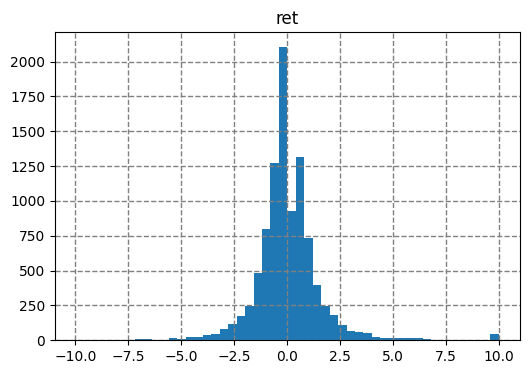

In [18]:
plt.figure(figsize=(6, 4))
plt.hist(research_data["ret"], bins=50)
plt.title('ret')
plt.grid(color = 'gray', linestyle = '--', linewidth = 1)
plt.show()

# 相關係數圖

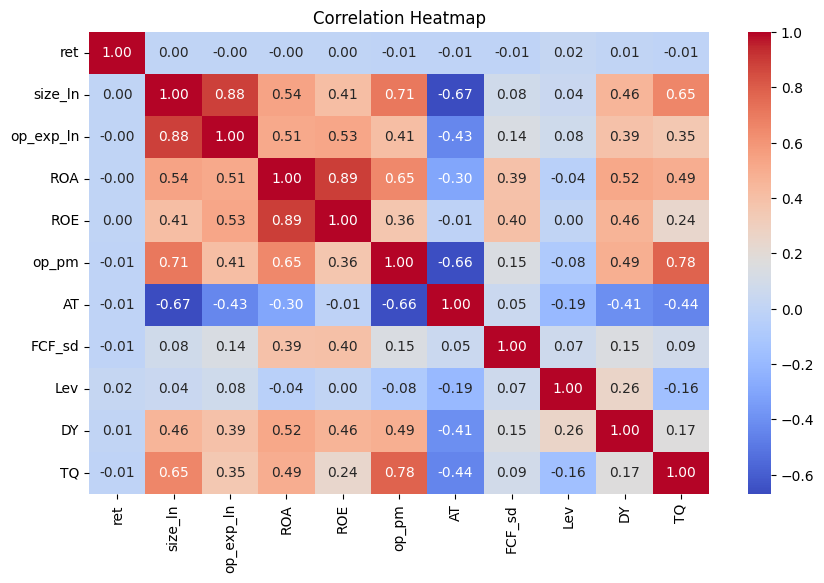

In [19]:

# 使用 Seaborn 繪製熱圖
plt.figure(figsize=(10, 6))
sns.heatmap(corr_table, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
